# 🍊 Orange is the new black

## Importing libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import sqlalchemy as db
from sqlalchemy import create_engine, types

import warnings
warnings.filterwarnings("ignore")

## Importing data from MySQL

In [10]:
# define connection credentials
hostname="127.0.0.1"
dbname="nutrition"
uname="root"
pwd="root"

# define engine connection
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
# connect into database
engine.connect()

In [11]:
# importing data from nutrition table
#df = pd.read_sql_query('SELECT * FROM nutrition.products', engine)

---------------------

## Data Preprocessing

In [21]:
df = pd.read_csv('../data/data_oranges.csv')

### **Notes**

Import du fichier CSV brut contenant toutes les données relatives à notre cible : le jus d'orange.
- 2458 lignes / 174 colonnes
- Pourçentage élevé de valeurs manquantes

### Data Cleaning

In [24]:
# read imported data set
clean_df = df

In [23]:
# 2458 rows / 174 columns
df.shape

(1099, 17)

Text(0.5, 1.0, '% of NaN nans per column')

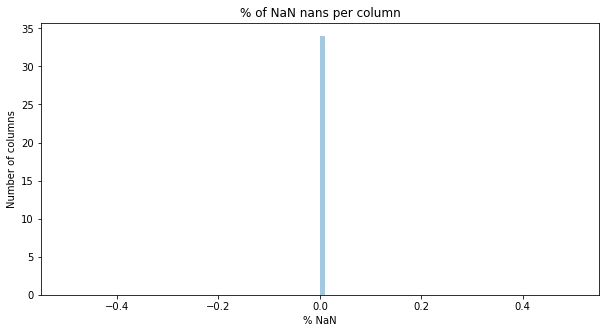

In [15]:
# checking missing values by plotting percentage per column
nan_percent = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

plt.figure(figsize=(10,5))
sns.distplot(nan_percent, bins=100, kde=False)
plt.xlabel("% NaN")
plt.ylabel("Number of columns")
plt.title("% of NaN nans per column")

## **Notes**

Nous conservons uniquement les colonnes contenant au moins 60% ou plus de données valides et nous supprimons également manuellement quelques colonnes jugées inutiles pour notre analyse (exemple : url de l'image).

Nous obtenons ainsi une réduction conséquente des colonnes : 17 au lieu de 174

In [16]:
# keep only columns where 60% or more valid data is available
clean_df=df.dropna(how='any',axis=1,thresh=df.shape[0]*0.6)

In [17]:
# sum of NaN values on 35 columns
clean_df.isnull().sum().sort_values(ascending=False)

product_name                               0
carbohydrates_100g                         0
energy_kcal_100g                           0
energy_100g                                0
fat_100g                                   0
saturated_fat_100g                         0
trans_fat_100g                             0
cholesterol_100g                           0
sugars_100g                                0
brands                                     0
fiber_100g                                 0
proteins_100g                              0
salt_100g                                  0
sodium_100g                                0
calcium_100g                               0
iron_100g                                  0
main_category                              0
brand_owner                                0
pnns_groups_2                              0
pnns_groups_1                              0
nova_group                                 0
nutriscore_grade                           0
nutriscore

In [20]:
# delete some columns
clean_df.drop(['code', 'creator', 'created_t', 'last_modified_t', 'states', 'url', 'image_small_url', 'image_front_url', 'image_front_small_url','image_url', 'main_category', 'categories', 'categories_tags', 'image_ingredients_small_url', 'image_ingredients_url', 'brands_tags', 'image_nutrition_small_url', 'image_nutrition_url'], axis=1, inplace=True)

KeyError: "['code' 'creator' 'created_t' 'last_modified_t' 'states' 'url'\n 'image_small_url' 'image_front_url' 'image_front_small_url' 'image_url'\n 'image_ingredients_small_url' 'image_ingredients_url'\n 'image_nutrition_small_url' 'image_nutrition_url'] not found in axis"

In [19]:
# 2458 rows, 17 columns
clean_df.shape

(300000, 34)

Nous remplacons certaines valeurs dans "countries" qui ont toute la même signification : France.

In [135]:
# replace values "en:fr" , "en:france", "en:FR" by "France" in countries
clean_df['countries'] = clean_df['countries'].replace(['en:fr', 'en:france', 'en:FR', 'fr', 'en:France'],'France')

In [136]:
clean_df['countries'].value_counts()

France                            2158
Belgique, France                    22
France, en:belgium                  18
Belgique,France                     16
France, Suisse                      14
                                  ... 
France, Luxembourg, en:belgium       1
France, Spain                        1
France,Guadeloupe                    1
Francia, Spain, en:portugal          1
Algérie,France,en:algeria            1
Name: countries, Length: 120, dtype: int64

Nous conservons uniquement les produits dont :
- le pays est la France (countries)
- le nutriscore_score / nutriscore_grade / nutrition-score-fr_100g / energy-kcal_100g est précisé

In [137]:
# keep only the product with countries = France
clean_df = clean_df.loc[clean_df['countries'] == 'France']

In [149]:
# keep only the products with brands and nutriscore
clean_df = clean_df.dropna(subset=['brands', 'nutriscore_score', 'nutriscore_grade', 'nutrition-score-fr_100g', 'energy-kcal_100g'])

Notre dataset "Orange is the new black" est désormais prêt à être exploré / analysé / visualisé : il n'y a plus de valeurs nulles et nous avons un échantillon conséquent de 1099 jus d'orange et leurs 17 valeurs distinctes.

In [153]:
# sum of NaN
clean_df.isnull().sum()

product_name               0
brands                     0
countries                  0
nutriscore_score           0
nutriscore_grade           0
pnns_groups_1              0
pnns_groups_2              0
energy-kcal_100g           0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [158]:
clean_df

,product_name,brands,countries,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
2,Pago Ace - Orange - Carotte - Citron,pago,France,3.0,c,Beverages,Sweetened beverages,40.0,168.0,0.5,0.1,9.2,9.2,0.5,0.0000,0.000,3.0
3,LE PUR JUS Orange sans pulpe,Joker,France,3.0,c,Beverages,Fruit juices,42.0,186.0,0.0,0.0,8.6,8.6,0.6,0.0125,0.005,3.0
14,Jus d'orange sans pulpe,innocent,France,2.0,c,Beverages,Fruit juices,36.0,155.0,0.0,0.0,7.8,7.8,0.7,0.0000,0.000,2.0
17,Innocent jus d'orange avec pulpe 900ml,Innocent,France,2.0,c,Beverages,Fruit juices,36.0,156.0,0.0,0.0,7.8,7.8,0.7,0.0000,0.000,2.0
23,LE PUR JUS Orange sans pulpe,joker,France,2.0,c,Beverages,Fruit juices,42.0,176.0,0.0,0.0,8.6,8.6,0.6,0.0125,0.005,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,Pur jus d’orange sans pulpe,"U,U Bio",France,2.0,c,Beverages,Fruit juices,41.0,172.0,0.5,0.1,8.7,8.7,0.7,0.0100,0.004,2.0
2442,Pur jus pomme orange,Les Vergers de Cousancelles,France,-2.0,b,Beverages,Fruit juices,34.0,142.0,0.1,0.0,8.4,4.2,0.4,0.0000,0.000,-2.0
2445,Pur jus d'orange,Prix Mini,France,4.0,c,Beverages,Fruit juices,45.0,192.0,0.5,0.1,9.3,9.3,0.7,0.0100,0.004,4.0
2446,le 100% pur jus Bio Orange,Franprix,France,3.0,c,Beverages,Fruit juices,39.0,167.0,0.0,0.0,9.1,9.1,0.7,0.0000,0.000,3.0


In [159]:
# export CSV
clean_df.to_csv('orangeisthenewblack.csv', index=False)